# **INSTRUCTIONS** 

Please create as many code cells as you may need. Comment whereever necessary. 

For the python implementations, create a copy of this file in your Google drive and edit that file.

Save the file name as your Assignment_01_registration_number.ipynb only. 

Only colab files will be considered valid submission.


For the handwritten part only scanned images in PDF format with file name as Assignment_01_registration_number.pdf only. 

# **TASK 1** - Performance Metrics(*Both Handwritten and Python Implementation*)







For some classification task usng machine learning aproach the ground truth and predicted values are given. Compute the ACCURACY performance metric based on the given predictions.

predicted y values

y_pred = [0, 2, 1, 3]


actual y values

y_true = [0, 1, 2, 3]

For the following pair of ground truth and predictions compute the following performance metrics based on the predictions given below

y_true = [2, 0, 2, 2, 0, 1]

y_pred = [0, 0, 2, 2, 0, 2]


*   Confusion Matrix (Please note that three are 3 classes in the example given, its not a binary classification problem)
*   Precision
*   Recall
*   F1-Score

**Hint**: For the python implementation you may use Scikit Learn Module. The metrics are available under from sklearn.metrics import .......... For more information please visit [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)


---













In [ ]:
#Your Solution will be placed below
import sklearn
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print('Accuracy = ',accuracy_score(y_true, y_pred))


Accuracy =  0.5


In [3]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
print('Confusion matrix = \n',confusion_matrix(y_true, y_pred))
print('Precision score = \n',precision_score(y_true, y_pred, average = None))
print('Recall score = \n',recall_score(y_true, y_pred, average = None))
print('f1 score = \n',f1_score(y_true, y_pred, average = None))

Confusion matrix = 
 [[2 0 0]
 [0 0 1]
 [1 0 2]]
Precision score = 
 [0.66666667 0.         0.66666667]
Recall score = 
 [1.         0.         0.66666667]
f1 score = 
 [0.8        0.         0.66666667]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **TASK 2** - Make a NN Learn the Conversion from Celsius to Farenheit (*Only Python Implementation*)



- In this task, we will build a simple machine learning model to convert from celsius to fahrenheit. 
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
- For Example, let's convert 0°C celsius temperature to Fahrenheit:  **(0°C × 9/5) + 32 = 32°F**


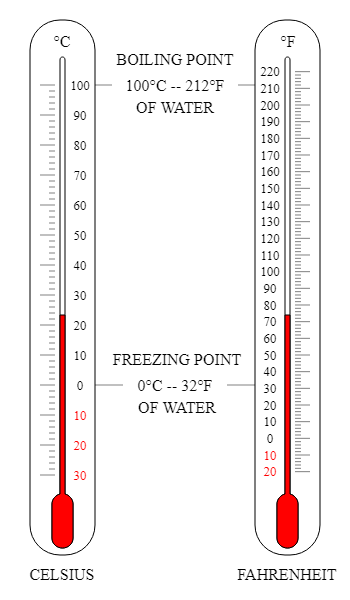

In [4]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

# point to the directory using "os" module to the location where you have the training data.

Mounted at /content/gdrive


In [ ]:
pwd


'/content'

In [5]:
#Import Required Modules
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/content/gdrive/My Drive/Colab Notebooks')

In [6]:
# You have to include the full link to the csv file containing your dataset. The file is included in the attachment in GCR
Temperature_df = pd.read_csv('Rahul Iyengar (RA1811038010025) - Celsius_to_Fahrenheit.csv')
Temperature_df.reset_index(drop=True, inplace=True)


In [7]:
Temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


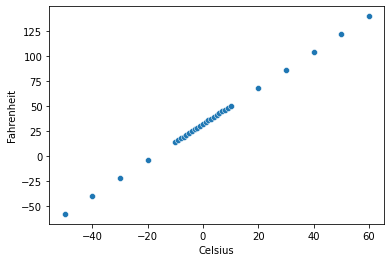

In [8]:
# Visualize Dataset
sns.scatterplot(Temperature_df['Celsius'], Temperature_df['Fahrenheit'])


In [9]:
 # CREATE TESTING AND TRAINING DATASET
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']
print(y_train)

0     -58.0
1     -40.0
2     -22.0
3      -4.0
4      14.0
5      15.8
6      17.6
7      19.4
8      21.2
9      23.0
10     24.8
11     26.6
12     28.4
13     30.2
14     32.0
15     33.8
16     35.6
17     37.4
18     39.2
19     41.0
20     42.8
21     44.6
22     46.4
23     48.2
24     50.0
25     68.0
26     86.0
27    104.0
28    122.0
29    140.0
Name: Fahrenheit, dtype: float64


In [10]:
# Build a Keras Based NN and train it. Its a single input, single neuron and single output case, so one weight and one bias.

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = [1])) # Single input, so input shape=[1]

In [11]:
# Get the weights learnt by the model. Use model.get_weights. See for yourself how the weights are helping in building the relationship between C to F
# Adam optimizer with 0.1 learning rate for faster convergence
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1), metrics = ['mean_squared_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
weights = model.get_weights()[0]
print(weights)
train = model.fit(X_train, y_train, epochs = 1000)
weights = model.get_weights()[0]
print(weights)


[[0.41572893]]
Epoch 1/1000
1/1 [==============================] - 1s 505ms/step - loss: 2170.1484 - mean_squared_error: 2170.1484
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 2015.5055 - mean_squared_error: 2015.5055
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 1871.3932 - mean_squared_error: 1871.3932
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 1737.9653 - mean_squared_error: 1737.9653
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 1615.3289 - mean_squared_error: 1615.3289
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 1503.5295 - mean_squared_error: 1503.5295
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 1402.5476 - mean_squared_error: 1402.5476
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 1312.2883 - mean_squared_error: 1312.2883
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss

In [13]:
# Use the trained model to perform predictions
Temp_C = 50
print('Temperature in degF Using Trained model =' , model.predict([Temp_C]))


Temperature in degF Using Trained model = [[121.98123]]


In [14]:
# Confirm the predicted output Using the equation: 
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = 122.0


# **TASK 3** - Learning XOR Function

Develop a multilayer perceprton with only Numpy module which can learn XOR function. Plot the error plot during the trainig process. You may take inspiration with the single perceptron learning implemented in class for AND and OR functions. The code is available in GCR under CODES topic, filename is 01_18MHE461T_Regression_Perceptron.ipynb

In [ ]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt

x1 = np.float32((np.array([1.,0.,1.,0.])))
x2 = np.float32((np.array([1.,1.,0.,0.])))
yd5 = np.float32((np.array([0.,1.,1.,0.])))

#Use the intial weights and biases exactly the same as we used in class. Use Section 6.4 as reference for various expressions from the following textbook 
#ARTIFICIAL INTELLIGENCE - A GUIDE TO INTELLIGENT SYSTEMS - MICHEAL NEGNEVITSKY



In [ ]:
#initialize weights and bias, epochs, learning rate

w13 = np.float32(0.5)
w14 = np.float32(0.9)
w23 = np.float32(0.4)
w24 = np.float32(1.0)
w35 = np.float32(-1.2)
w45 = np.float32(1.1)
b3 = np.float32(0.8)
b4 = np.float32(0.1)
b5 = np.float32(0.3)
learn = np.float32(0.05)
no_examples = 4
no_epochs = 8000
sq_error = []
error = []

In [ ]:
#define activation  function 
#%%sigmoid function
def transfer(activation):
	return 1.0 / (1.0 + exp(-1*activation))

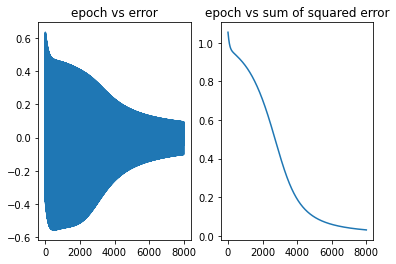

In [ ]:
#your code goes here

for i in range(0, no_epochs):
  loss = 0
  for j in range(no_examples):
    
    # forward propagation
    y3 = transfer((x1[j] * w13 + x2[j] * w23 - b3))
    y4 = transfer((x1[j] * w14 + x2[j] * w24 - b4))
    y5 = transfer((y3 * w35 + y4 * w45 - b3))
    err = yd5[j] - y5
    loss = loss + err**2  # for calculating sum of squared errors
    error.append(err)
    
    # back propagation
    g5 = y5 * (1 - y5) * err
    del_b5 = learn*(-1)*g5
    del_w45 = learn*y4*g5
    del_w35 = learn*y3*g5

    g4 = y4 * (1 - y4) * w45 * g5
    del_b4 = learn * (-1) * g4
    del_w24 = learn * x2[j] * g4
    del_w14 = learn * x1[j] * g4

    g3 = y3 * (1 - y3) * w35 * g5
    del_b3 = learn * (-1) * g3
    del_w23 = learn * x2[j] * g3
    del_w13 = learn * x1[j] * g3
    
    # Weight updation
    w13 = w13 + del_w13
    w14 = w14 + del_w14
    w23 = w23 + del_w23
    w24 = w24 + del_w24
    w35 = w35 + del_w35
    w45 = w45 + del_w45
    b3 = b3 + del_b3
    b4 = b4 + del_b4
    b5 = b5 + del_b5
  sq_error.append(loss)


epochs = np.linspace(1,no_epochs,len(error))
s_epochs = np.linspace(1,no_epochs,len(sq_error))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('epoch vs error')
ax1.plot(epochs,error)
ax2.set_title('epoch vs sum of squared error')
ax2.plot(s_epochs,sq_error)


# **TASK 4** - Iris Classification 

Develop a multilayer perceprton with Tensorflow (Keras API) module which can learn IRIS function. Obtain the test set error.

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf

In [16]:
dataset = sns.load_dataset('iris')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
X = dataset.drop(['species'], axis=1)
y = pd.get_dummies(dataset.species, prefix='output')
X.head()
y.head()

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [18]:
X = X.values
y = y.values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 39)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Build a tensorflow. keras based neural network. Let the network have three hidden layers with 100, 50 and 25 respectively (Similar to MNIST example done in class)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_dim = 4, activation = 'relu'))     # 3 input features fully connected to 100 1st hidden layer neurons
model.add(tf.keras.layers.Dense(50, activation = 'relu'))                     # 1st hidden layer fully connected to 50 2nd hidden layer neurons
model.add(tf.keras.layers.Dense(25, activation = 'relu'))                     # 2nd hidden layer fully connected to 25 3rd hidden layer neurons
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))                   # 3rd hidden layer fully connected to 3 output labels


In [22]:
#train the model
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(0.1), metrics = ['accuracy'])
model.summary()
train = model.fit(X_train, y_train, epochs = 40)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 78        
Total params: 6,903
Trainable params: 6,903
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
4/4 [==============================] - 0s 3ms/step - loss: 1.0911 - accuracy: 0.3575
Epoch 2/40
4/4 [==============================] - 0s 5ms/step - loss: 0.3903 - accuracy: 0.8017
Epoch 3/40
4/4 [==============================] - 0s 3ms/s

In [23]:
#evaluate the model on the test set

score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 289ms/step - loss: 0.0051 - accuracy: 1.0000


In [ ]:
#predict for X-test
soft = model.predict(X_test)
y_test_predictions = tf.dtypes.cast(tf.argmax(soft, 1), tf.int32) #find predictions as class label
y_test_gnd_truth = tf.dtypes.cast(tf.argmax(y_test, 1), tf.int32) #find gnd_truth as class label
print(y_test_predictions)
print(y_test_gnd_truth)
print(y_test_predictions==y_test_gnd_truth) #compare  predictions and gnd_truth

tf.Tensor([0 0 2 1 0 0 2 0 2 2 1 0 2 1 1 1 2 2 2 0 2 0 0 1 1 0 2 1 2 1], shape=(30,), dtype=int32)
tf.Tensor([0 0 2 1 0 0 2 0 2 2 1 0 2 1 1 1 2 2 2 0 2 0 0 1 1 0 2 1 2 1], shape=(30,), dtype=int32)
tf.Tensor(
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True], shape=(30,), dtype=bool)


# **TASK 5** - Activation Functions

Create some of the most frequently used activation functions and plot them. Sigmoid function and its derivative is done for you. Perform in a similar lines for the remaining functions. 

## Sigmoid (Logistic) Function

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$


Pros:

* Easy derivative
* Function looks like we think a neuron might function: it is either off or outputing a value (up to a maximum)

Cons: 

* Not symmetric, which causes issues when training
* Susceptible to vanishing gradients: when input values are saturated (either positively or negatively), the derivative is close to zero.

##### Derivative

Derivative of the sigmoid is easy to calculate if you know the output:

$$
\frac{d\sigma}{dx} = \sigma \left(1 - \sigma \right)
$$


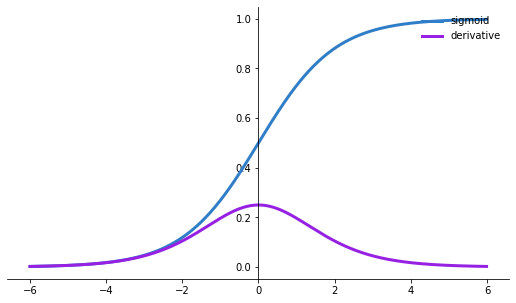

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    ds = s*(1-s)  #derivative
    return s,ds
x=np.arange(-6,6,0.01)
sigmoid(x)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,sigmoid(x)[0], color = "#307EC7", linewidth = 3, label = "sigmoid")
ax.plot(x,sigmoid(x)[1], color = "#9621E2", linewidth = 3, label = "derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

## Hyperbolic Tangent (Tanh)

$$
tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1}
$$

Pros:
* Similar to sigmoid, but "stretched" to range from (-1, 1)
* Symmetric around 0, which helps for optimization

Cons:
* Still suffers from vanishing gradient
##### Derivative

$$
\frac{dtanh}{dx} = 1 - tanh^{2} 
$$

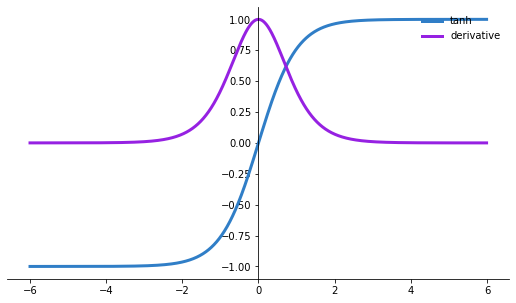

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    t = (np.exp(2*x) - 1)/(np.exp(2*x) + 1)
    dt = 1 - t**2  #derivative
    return t,dt
x=np.arange(-6,6,0.01)
tanh(x)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,tanh(x)[0], color = "#307EC7", linewidth = 3, label = "tanh")
ax.plot(x,tanh(x)[1], color = "#9621E2", linewidth = 3, label = "derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

## Rectified Linear Unit (ReLU)

$$
ReLU(x) = max\left(0,x\right) \\ \\
$$

Equivalent to:

$$
\begin{align*}
  ReLU(x) = \begin{cases}
    0 & \text{if $x\lt0$} \\
    x & \text{if $x\geq0$}
  \end{cases}
\end{align*}
$$

Pros:
* Incredibly easy to calculate output and derivative
* Doesn't suffer from vanishing gradient on positive side
* In practice tend to be more useful than Sigmoid/Tanh for typical activation functions

Cons:
* Not symmetric
* Can cause exploding activations if not careful
* Gradient can "die" if not careful

##### Derivative

$$
\begin{align*}
  \frac{dReLU}{dx} = \begin{cases}
    0 & \text{if $x\lt0$} \\
    1 & \text{if $x\geq0$}
  \end{cases}
\end{align*}
$$

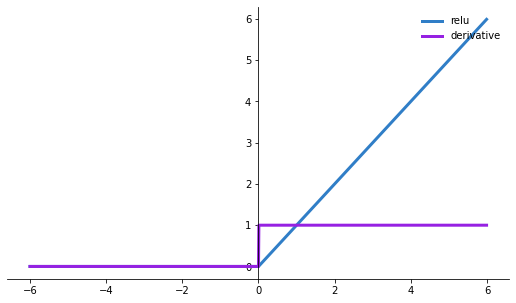

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    r = np.maximum(0,x)
    dr = r/x  #derivative
    return r,dr
x=np.arange(-6,6,0.01)
relu(x)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,relu(x)[0], color = "#307EC7", linewidth = 3, label = "relu")
ax.plot(x,relu(x)[1], color = "#9621E2", linewidth = 3, label = "derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

## Leaky ReLU

$$
LReLU(x) = max\left(\alpha x,x\right) \\ \\
$$

Equivalent to:

$$
\begin{align*}
  ReLU(x) = \begin{cases}
    \alpha x & \text{if $x\lt0$} \\
    x & \text{if $x\geq0$}
  \end{cases}
\end{align*}
$$

Pros:
* Similar to ReLU, but doesn't "die".

Cons:
* Yet another hyper-parameter to tune.

##### Derivative

$$
\begin{align*}
  \frac{dReLU}{dx} = \begin{cases}
    \alpha & \text{if $x\lt0$} \\
    1 & \text{if $x\geq0$}
  \end{cases}
\end{align*}
$$


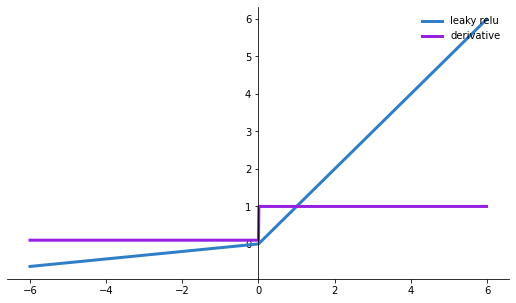

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def lrelu(x):
    a = 0.1
    lr = np.maximum(a*x,x)
    dlr = lr/x  #derivative
    return lr,dlr
x=np.arange(-6,6,0.01)
lrelu(x)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,lrelu(x)[0], color = "#307EC7", linewidth = 3, label = "leaky relu")
ax.plot(x,lrelu(x)[1], color = "#9621E2", linewidth = 3, label = "derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()